In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
alcohol = pd.read_csv('data/alcohol_outcomes.csv')

In [17]:
alcohol['timein']=pd.to_datetime(alcohol['timein'])
alcohol['timeout']=pd.to_datetime(alcohol['timeout'])
alcohol['exposure']=alcohol['timeout']-alcohol['timein']
alcohol['exposure']=alcohol['exposure'].dt.days / 365.25
alcohol['age']=alcohol['agein'].round()

C:\Users\14408\AppData\Local\Temp\ipykernel_28652\387885723.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  alcohol['timein']=pd.to_datetime(alcohol['timein'])
C:\Users\14408\AppData\Local\Temp\ipykernel_28652\387885723.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  alcohol['timeout']=pd.to_datetime(alcohol['timeout'])


In [21]:
to_poisson = alcohol.groupby(['age','alcohol','drug.use']).agg(
    deaths=('death', 'sum'),  # Sum binary death indicators to get counts
    exposure=('exposure', 'sum')  # Sum exposure times
).reset_index()

In [22]:
to_poisson['drug.use']=str(to_poisson['drug.use'])
to_poisson['alcohol']=str(to_poisson['alcohol'])

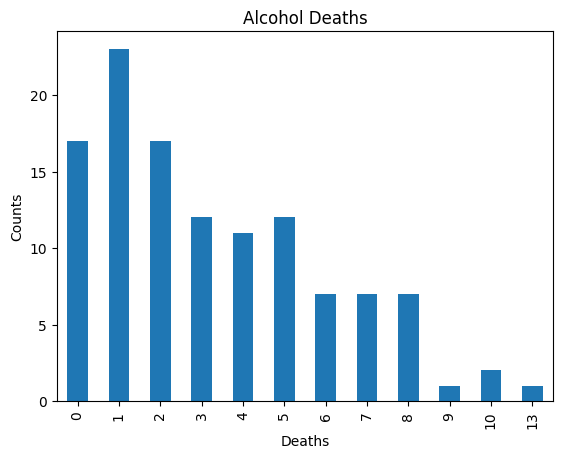

In [23]:
counts = to_poisson['deaths'].value_counts().sort_index()

counts.plot(kind='bar')

# Label the plot
plt.title('Alcohol Deaths')
plt.xlabel('Deaths')
plt.ylabel('Counts')
plt.show()

In [24]:
to_poisson.to_csv('data/poisson.csv')